In [1]:
import sys
import os
import importlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# import own helpers
import countperyear_to_table
# uncomment next line to reload the helper after code change
# importlib.reload(countperyear_to_table)

In [3]:
# grab the count of people alive for each year.
# There's two files: one containing the data from [1800, 1900), and one from [1900, 2010].
x_years, total_per_year, male_per_year, female_per_year = \
    (np.array(a) for a in
    countperyear_to_table.fullcount_output(
    "../output/peryear/countperyear_out.txt", "../output/peryear/with_alive2.txt")
    )

In [4]:
# you can check the data here.
# total_per_year

In [5]:
# Graph the number of people alive per each year.

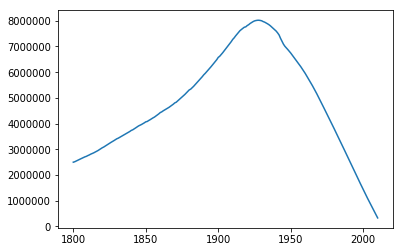

In [6]:
def graph_alive_per_year_all():
    plt.plot(x_years, total_per_year)
graph_alive_per_year_all()

In [7]:
# The population grows until the start of the 20th century, then sharply drops off. Which year does it drop off?

In [8]:
x_years[list(total_per_year).index(max(total_per_year))]

1928

In [9]:
# I think? the dropoff is because people making geneologies are more interested in knowing about their ancestors
# not their living relatives?
# So maybe this data isn't a good representation of the population, although it does pass a few more tests,
# for example: if we expect this data to represent the population, the male/female ratio should be around 50%.

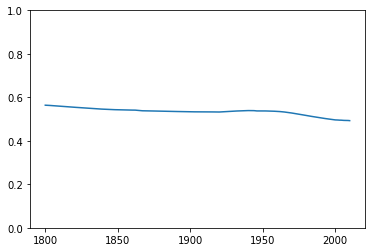

In [10]:
def graph_male_female_ratio():
    plt.ylim(0, 1)
    plt.plot(x_years, male_per_year / total_per_year)
graph_male_female_ratio()

In [11]:
# Indeed, male-female ratio starts at 56% and ends around 50% (maybe it's easier to find one's male ancestors?)

In [12]:
# For this experiment, I randomly selected a percentage of people alive during 1809, and counted
# their descendants.

In [13]:
# load the data
ratios = ["1", "5", "10", "15", "20"] # percent of the population alive in 1809
filenames = ["alive_per_year_1.txt", "bfsout.txt", "alive_per_year_10.txt",
             "alive_per_year_15.txt", "alive_per_year_20.txt"]
descendants_counts = [np.array(countperyear_to_table.bfsout_output("../output/bfs_output/" + a))
                     for a in filenames]

In [14]:
# uncomment to print the counts
# descendants_counts

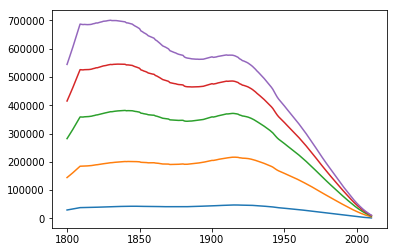

In [15]:
def graph_absolute_descendants_per_year():
    #plt.plot(x_years, total_per_year, label="Total")
    for i in range(len(ratios)):
        plt.plot(x_years, descendants_counts[i], label=ratios[i] + "%")
graph_absolute_descendants_per_year()

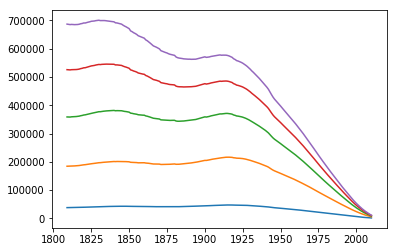

In [16]:
# OK, the linear upwards trend from 1800 to 1809 is because we only started choosing people in 1809...
# let's try graphing it only from 1809:
def graph_absolute_descendants_per_year_1809():
    #plt.plot(x_years, total_per_year, label="Total")
    start = 1809 - 1800
    for i in range(len(ratios)):
        plt.plot(x_years[start:], descendants_counts[i][start:], label=ratios[i] + "%")
graph_absolute_descendants_per_year_1809()

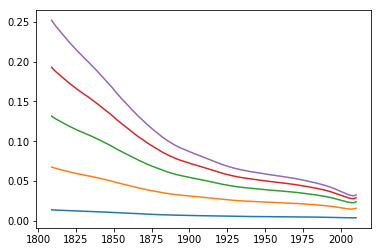

In [17]:
def graph_relative_descendants_per_year():
    #plt.plot(x_years, total_per_year, label="Total")
    start = 1809 - 1800
    total = total_per_year[start:]
    for i in range(len(ratios)):
        plt.plot(x_years[start:], descendants_counts[i][start:] / total, label=ratios[i] + "%")
graph_relative_descendants_per_year()